Import useful libraries

In [4]:
import functions as fn
import numpy as np
import matplotlib.pyplot as plt

Simulation Parameters

In [19]:
Sim_period = 10000  # ms
Sim_fs = 1000  #Hz

Sim_dt = 1/Sim_fs
Sim_t = np.arange(0,Sim_period,Sim_dt)

## Simple Model

In [28]:
C     = 200 # pF
vr    = -60 # mV
vt    = -45 # mV
k     = .75
a     = .01 # ms # decreasing increases the subthreshold oscillation
b     = 15
c     = -50
d     = 100

vpeak = 30  # spike cutoff (mV)

I_stim = 165;

In [29]:
v     = vr * np.ones(Sim_t.shape); 
u     = 0 * v; 

In [30]:
out, freq = fn.gen_chirp(Chirp_init_freq=.0001, 
                         Chirp_init_time=0, 
                         Chirp_end_freq=.01, 
                         Chirp_end_time=Sim_t[-1], 
                         time_points=Sim_t)

I      = .1 * I_stim * out  # pA

# I      = I_stim * np.ones(Sim_t.shape)  # pA

In [31]:
for i in range(Sim_t.shape[0]-1): 
       
    # forward Euler method
    dvdt   = Sim_dt * (k*(v[i]-vr)*(v[i]-vt)-u[i]+I[i]) / C
    v[i+1] = v[i]+ dvdt
    
    dudt   = Sim_dt * a*(b*(v[i]-vr)-u[i])
    u[i+1] = u[i] + dudt

    if v[i+1] >= vpeak:      # a spike is fired!
        
        v[i]   = vpeak       # padding the spike amplitude
        v[i+1] = c           # membrane voltage reset
        u[i+1] = u[i+1] + d  # recovery variable update

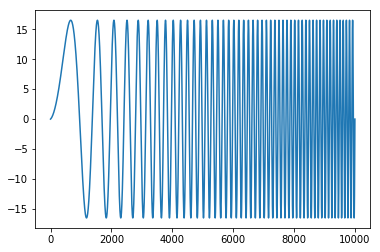

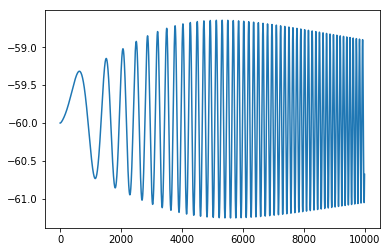

In [32]:
plt.plot(Sim_t, I)
plt.show()
plt.plot(Sim_t, v)
plt.show()